# Linera Regression with Regularization - Gradient Descent
using Gradient Descent Algorithm

<h3> Gradient Descent Algorithm with Regularization </h3>
<p>
We start with assumpution equation (Called hypothesis) which can fit above data points.   
<p>
$h(x) = w_0 + w_1 x$
</p> 
The two coefficients with initial guess (i.e. $w_0$ and $w_1$) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.

<p>
 Our objective is to minimize Loss.
    <p>
 $ L(W)=   \hat{Y}-Y$  Where  $\hat{Y}=h(X)$
 </p>
Since Loss can negative or postive, we need to minimize the absolute values ( OR Mean squared) Loss so we define Loss/Cost function as follows

<h3>Cost/Loss Function with Regularization</h3>
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$L(W) = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left ( \hat{Y}_{i}- Y_{i} \right)^2+\frac{1}{n} \frac{\lambda}{2} \sum_{j} w_{j}^{2}$
<p>
$L(w_0, w_1)  = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left (h(x_{i}) - y_{i} \right)^2 +\frac{1}{n} \frac{\lambda}{2}  \sum_{j} w_{j}^{2}$ 

This Loss/cost function is also called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$  term.

We minimize Loss by taking the derivative (the tangential line to a function) of our cost/loss function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost/loss function in the direction with the steepest descent. The size of each step is determined by the parameter α($alpha$), which is called the learning rate. The direction in which the step is taken is determined by the partial derivative of $L(w_0,w_1)$. 

The gradient descent algorithm is:

repeat until convergence:<p>
{<p>
&nbsp;&nbsp;    $w_0 := w_0 - \alpha \frac{\partial}{\partial w_0} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
&nbsp;&nbsp;    $w_1 := w_1 - \alpha \frac{\partial}{\partial w_1} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
}

OR<p>
$\begin{align*} \text{repeat until convergence: } \lbrace & \newline w_0 := & w_0 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(h_w(x_{i}) - y_{i}) + \frac{\lambda}{n} \sum_{j} w_{j}\newline w_1 := & w_1 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}\left((h_w(x_{i}) - y_{i}) x_{i}\right) + \frac{\lambda}{n} \sum_{j} w_{j}\newline \rbrace& \end{align*}$

In [1]:
import numpy as np
import scipy.optimize as op
import pandas as pd 
import matplotlib.pyplot as plt


<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset
dfTest = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')   #Test Dataset
dfValid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv') #Validation Dataset
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

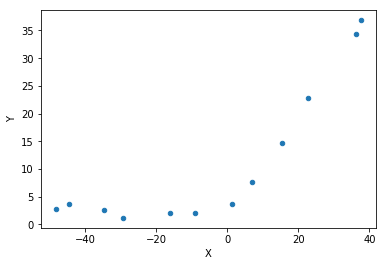

In [3]:
dfTrain.plot(x='X',y='Y',kind='scatter')

<h2>Extract Input Feature to <b>X </b>and Label to <b>y</b>

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:1]
    df_Label=df.iloc[:,1:2]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)
Xval,Yval=extractFeatures(dfValid)
Xtest,Ytest=extractFeatures(dfTest)

# Helper Functions

In [6]:
def mapFeature(X,degree):
    
    sz=getThetaSizeFromDegree(X,degree)
    out=np.ones((X.shape[0],sz))

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    
    return out

In [7]:
def getThetaSizeFromDegree(X,degree):
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1
    return sz

In [8]:
def getDegreeFromTheta(theta,X):
    sz=theta.shape[0]
    if (X.shape[1]==2):
        degree=(np.sqrt(sz*8+1)-3)/2
        degree=int(degree)
    else:
         degree=sz-1
    return degree

In [9]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    #Handle Bias Vector
    if(mu[0]==1 and sigma[0]==0):
        mu[0]=0
        sigma[0]=1
    X_norm = X - mu
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [10]:
def computeCost(theta,X,y,regLambda):
    m,n = X.shape
    theta.shape = (n,1)

    h=np.matmul( X,theta)                      #Hypothesis
    err=h-y
    errSqr=err**2
    J=(1.0/(2.0*m))* np.sum(errSqr)
    
    
    regularized_theta=np.concatenate((np.zeros((1,1)) , theta[1:,:]),axis=0)
    J=J +regLambda* (1.0/(2.0*m)) *(np.sum(regularized_theta**2))
 
    
    return J


In [11]:

def initTheta(X,degree):
    size=getThetaSizeFromDegree(X,degree)
    #newTheta=np.random.rand(size, 1)*1000
    newTheta=np.zeros((size, 1))
    return  newTheta

def gradientDescent(X, y, theta, alpha, iterations,degree,regLambda):        
    m=len(y)
    I=np.zeros((iterations,1),dtype=float)
    J=np.zeros((iterations,1),dtype=float)
    for k in range(iterations):
        h=np.matmul( X,theta)                      #Hypothesis
        err=h-y
        d=np.matmul(err.T,X)  
        g=  alpha*((1.0/m)*d)              #Derivative
        g=g.T     #Theta Itrations  
        regularized_theta=np.concatenate((np.zeros((1,1)) , theta[1:,:]),axis=0)
        g=g+ (regLambda/m)*regularized_theta 
        I[k]=k*1.0
        J[k]=computeCost(theta,X,y,regLambda)
        theta=theta-g
    
    
    
    plt.plot(I, J,color='r')
    return theta

####################################################################
def addBiasVector(X):
    return np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

In [12]:
def computeGradient(theta,X,y,regLambda):
    m,n = X.shape
    theta.shape = (n,1) 
    h=np.matmul( X,theta)                      #Hypothesis
    err=h-y
    d=np.matmul(err.T,X)  
    g=  (1.0/m)*d
    g=g.T
    regularized_theta=np.concatenate((np.zeros((1,1)) , theta[1:,:]),axis=0)
        
    g=g + (regLambda/m)*regularized_theta

    

    return g.flatten()

In [13]:
def optimizedGradientDescent(X, y,degree,regLambda):        
    maxiter = 200
    theta =np.zeros((X.shape[1], 1))
    Result = op.minimize(fun = computeCost, x0 = theta,  args = (X, y,regLambda), options={'disp': False, 'maxiter':maxiter}, method="L-BFGS-B",jac = computeGradient)
    optimal_theta = Result.x
    return optimal_theta

In [14]:
def predict(theta,X,mu, sigma):
    degree=getDegreeFromTheta(theta,X)
    X=mapFeature(X,degree)
    X = X - mu
    X = X/sigma
    Py=np.matmul(X, theta)
    return Py

# Plotting With Different Regularization Parameters and degree

In [15]:
def plotHypothesis(theta,X,y,regLambda,mu, sigma):
    degree=getDegreeFromTheta(theta,X)
    plt.scatter(X,y) 
    plt.title("Lambda="+str(regLambda)+",Degree="+str(degree))
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=predict(theta,u,mu, sigma) 
    plt.plot(u, v,color='r')

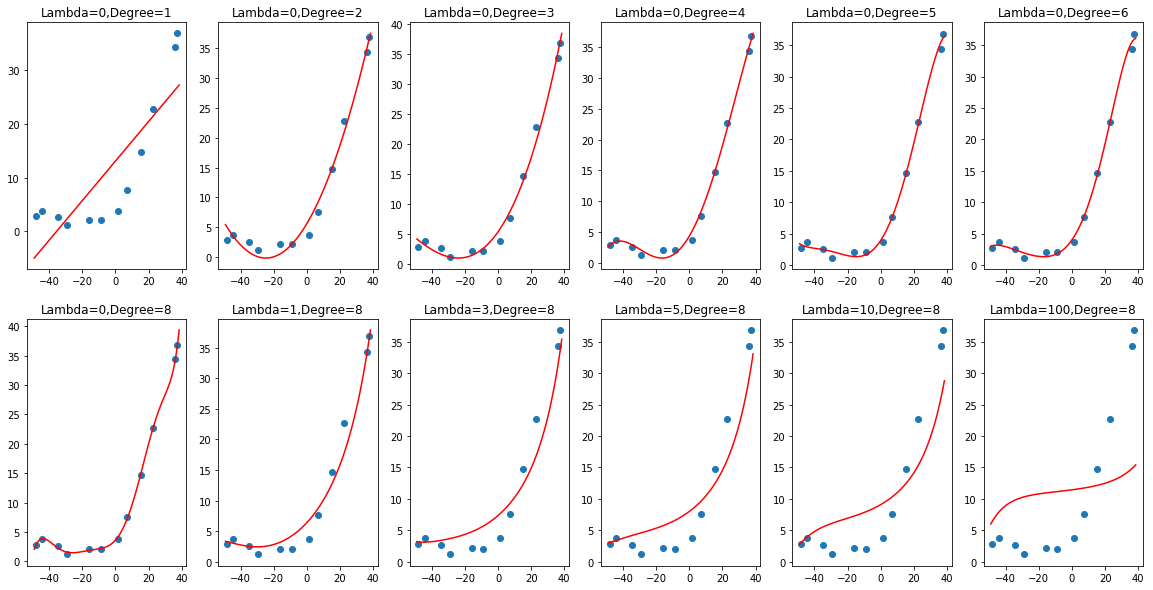

In [16]:
plt.figure(figsize=(20,10))
regLambdaList=[0,0,0,0,0,0,0,1,3,5,10,100]
degreeList=[1,2,3,4,5,6,8,8,8,8,8,8]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
    Xp=mapFeature(X,degree)    #Polynomial
    Xn, mu, sigma = featureNormalize(Xp)  # Normalize
    theta = optimizedGradientDescent(Xn, Y, degree,regLambda)  
    #Without Lib   
    #theta = gradientDescent(Xn, y, theta,alpha,iter,degree,regLambda)
    plt.subplot(2 , int(len(regLambdaList)/2 +0.5), i+1)
    plotHypothesis(theta,X,Y,regLambda,mu, sigma)
plt.show()

# Plotting Learning Curve

In [17]:
def plotLearningCurve(Xtrain, ytrain, Xval, yval, degree,regLambda):
    m = len(Xtrain)
    Xtrain_p=mapFeature(Xtrain,degree)    #Polynomial
    Xtrain_n, mu, sigma = featureNormalize(Xtrain_p)  # Normalize

    Xval_p=mapFeature(Xval,degree)    #Polynomial
    Xval_n = Xval_p - mu
    Xval_n = Xval_n/sigma
    
    training_error = np.zeros((m, 1))
    validation_error   = np.zeros((m, 1))

    for i in range(m):
        #Learning
        Current_Xtrain=Xtrain_n[0:i+1]
        Current_ytrain=ytrain[:i+1]
        theta = optimizedGradientDescent(Current_Xtrain, Current_ytrain,degree,regLambda)        
        training_error[i]=computeCost(theta,Current_Xtrain,Current_ytrain,0)
        validation_error[i]=computeCost(theta,Xval_n,yval,0)
    
    plt.plot(range(1,m+1), training_error)
    plt.plot( range(1,m+1), validation_error)
    plt.title('Learning Curve (Lambda = '+str(regLambda)+',Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Training")
    plt.ylabel("Error/Cost")
    return


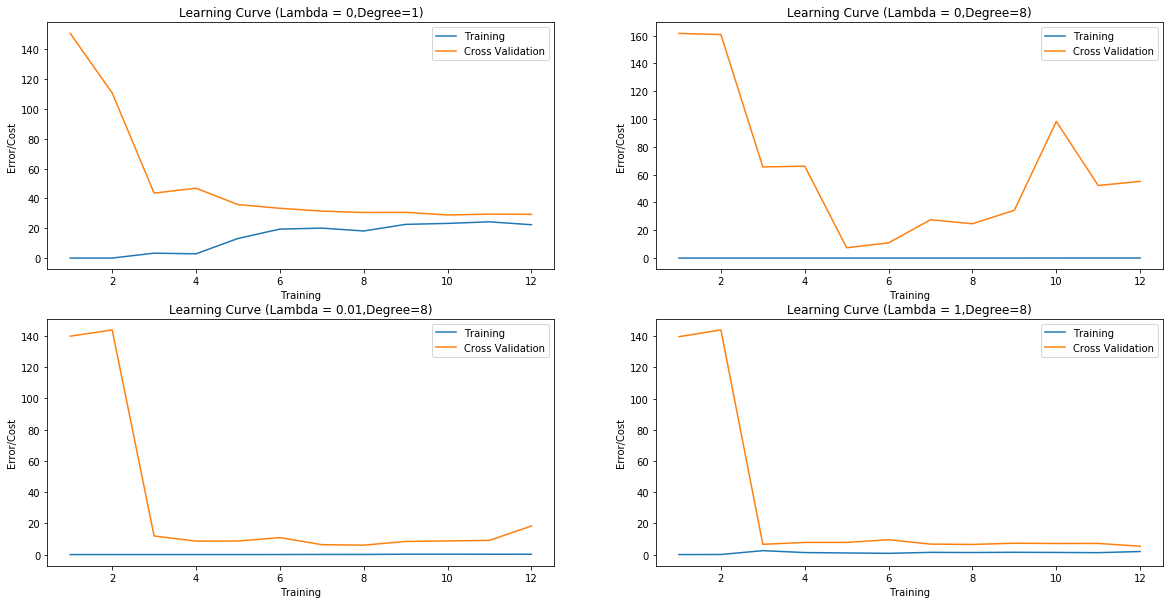

In [18]:
plt.figure(figsize=(20,10))
regLambdaList=[0,0,0.01,1]
degreeList=[1,8,8,8]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
    plt.subplot(2 , int(len(regLambdaList)/2 +0.5), i+1)
    plotLearningCurve(X,Y,Xval,Yval,degree,regLambda)
plt.show()

# Plotting Validation Curve

In [19]:
def plotValidationCurveForLambda(Xtrain, ytrain, Xval, yval, degree,regLambdaList):
    
    Xtrain_p=mapFeature(Xtrain,degree)    #Polynomial
    Xtrain_n, mu, sigma = featureNormalize(Xtrain_p)  # Normalize

    Xval_p=mapFeature(Xval,degree)    #Polynomial
    Xval_n = Xval_p - mu
    Xval_n = Xval_n/sigma
    
    training_error = np.zeros((len(regLambdaList), 1))
    validation_error   = np.zeros((len(regLambdaList), 1))

    for i in range(len(regLambdaList)):
        regLambda=regLambdaList[i]
        theta = optimizedGradientDescent(Xtrain_n, ytrain, degree,regLambda)
        training_error[i]=computeCost(theta,Xtrain_n,ytrain,0)
        validation_error[i]=computeCost(theta,Xval_n,yval,0)
    
    plt.plot(regLambdaList, training_error)
    plt.plot( regLambdaList, validation_error)
    plt.title('Validation Curve (Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Lambda")
    plt.ylabel("Error/Cost")
    return

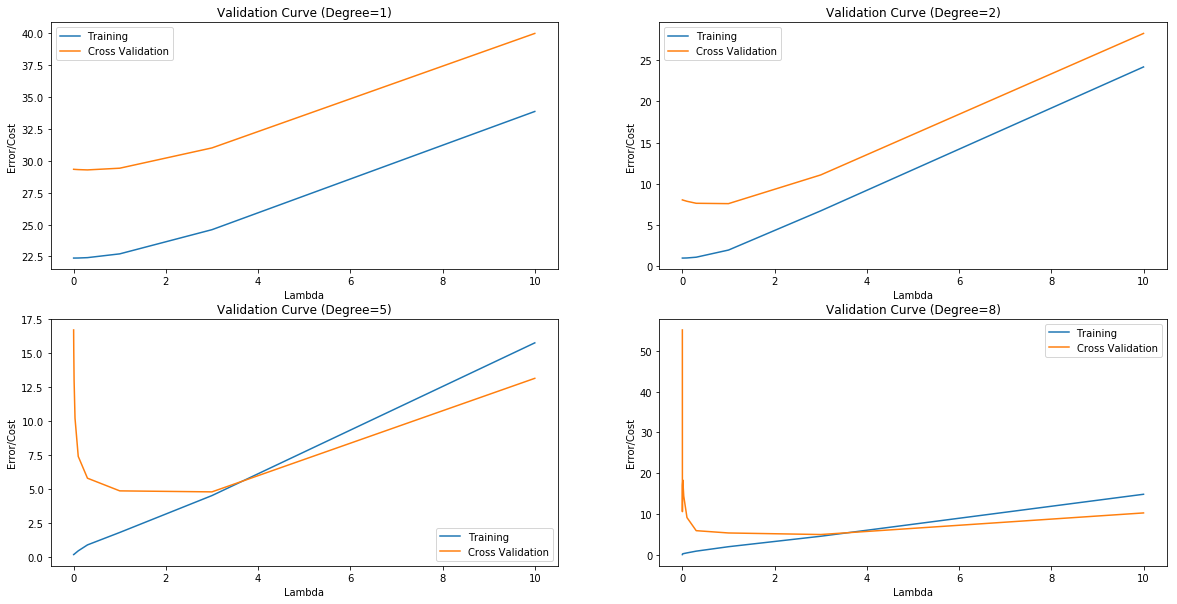

In [20]:
plt.figure(figsize=(20,10))
degreeList=[1,2,5,8]
regLambdaList=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for i in range(len(degreeList)):
    degree=degreeList[i]
    plt.subplot(2 , int(len(degreeList)/2 +0.5), i+1)
    plotValidationCurveForLambda(X,Y,Xval,Yval,degree,regLambdaList)
plt.show()

# Final Plot and Test Error

In [21]:
def plotFinalCurve(Xtrain, ytrain, Xtest, ytest, degree,regLambda):
    Xp=mapFeature(Xtrain,degree)    #Polynomial
    Xn, mu, sigma = featureNormalize(Xp)  # Normalize
    theta = optimizedGradientDescent(Xn, ytrain, degree,regLambda)        
    Xtest_p=mapFeature(Xtest,degree)    #Polynomial
    Xtest_n = Xtest_p - mu
    Xtest_n = Xtest_n/sigma
    testErr=computeCost(theta,Xtest_n,ytest,0)
    #PLOT   
    X=np.concatenate((Xtrain,Xtest),axis=0)
    y=np.concatenate((ytrain,ytest),axis=0)
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=predict(theta,u,mu, sigma) 
    plt.plot(u, v,color='r')
    plt.scatter(Xtrain,ytrain) 
    plt.scatter(Xtest,ytest)
    plt.title("Test data Lambda="+str(regLambda ) +" , degree="+str(degree)+" with Error="+str(round(testErr,4)))
    plt.legend(("Regression(Lambda=3,degree=8)","Training Data","Test Data"))
    return

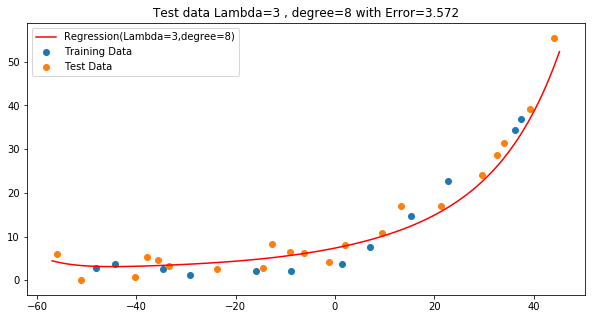

In [22]:
plt.figure(figsize=(10,5))
degree=8
regLambda=3
plotFinalCurve(X,Y,Xtest,Ytest,degree,regLambda)
plt.show()